In [1]:
import matplotlib.pyplot as plt
from shapely import wkt
import geopandas as gpd
import seaborn as sns
import networkx as nx
import pandas as pd
import numpy as np

In [2]:
save = True # save figures
present = True # format figures for a presentation and save in the presetnation folder

if present:
    plt.style.use('metropolis')
    save_folder = 'presentation'
else:
    plt.style.use('default')
    plt.rcParams.update({
        "font.family": "serif",  # use serif/main font for text elements
        "text.usetex": True,     # use inline math for ticks
        "pgf.rcfonts": False     # don't setup fonts from rc parameters
        })
    save_folder = 'paper'

In [3]:
## Read the network files
G = nx.read_gml('data/network/BMA_road_network.gml')

roads = pd.read_csv('data/network/BMA_roads.csv')
roads['geometry'] = roads['geometry'].apply(wkt.loads)
roads = gpd.GeoDataFrame(roads, geometry='geometry')

intersections = pd.read_csv('data/network/BMA_intersections.csv')
intersections['geometry'] = intersections['geometry'].apply(wkt.loads)
intersections = gpd.GeoDataFrame(intersections, geometry='geometry')

us_states = gpd.read_file('data/utilization/cb_2022_us_state_500k/cb_2022_us_state_500k.shp').to_crs('EPSG:2893')

/var/folders/7l/ffzd6jqd4k1g060d9whf4v2c0000gn/T/ipykernel_73378/3619351789.py:4: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  roads = pd.read_csv('data/network/BMA_roads.csv')


In [4]:
## Journey to work data
jtw = pd.read_csv('data/utilization_stats/jtw.csv')
jtw['home'], jtw['work'] = jtw['home'].astype(str), jtw['work'].astype(str)

In [5]:
## Census tract locations (Requires JTW Data)
tracts = pd.read_csv('data/utilization_stats/tracts.csv')
tracts['geometry'] = tracts['geometry'].apply(wkt.loads)
tracts = gpd.GeoDataFrame(tracts)

In [6]:
## Sizes of networks
print(f'Edges: {len(roads)}')
print(f'Destroyed Edges: {(roads['highway'] == 'destroyed').sum()}')
print(f'Nodes: {len(intersections)}')

Edges: 218842
Destroyed Edges: 4
Nodes: 91300


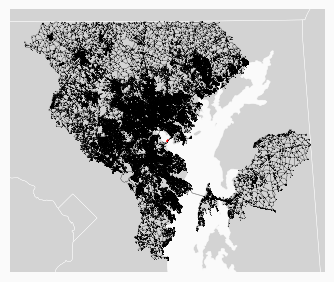

In [7]:
## map of the network
fig, ax = plt.subplots()
fig.set_figwidth(6.5 / 2) # page width
ax.axis('off')

# roads that weren't destroyed
roads[roads['highway'] != 'destroyed'].plot(
    color='dimgray',
    linewidth=0.25,
    zorder=5,
    ax=ax
)

# roads that were destroyed
roads[roads['highway'] == 'destroyed'].plot(
    color='red',
    linewidth=1,
    zorder=10,
    ax=ax
)

# intersections
intersections.plot(
    color='black',
    markersize=0.1,
    zorder=15,
    ax=ax
)

# bounds
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add land
us_states.plot(
    facecolor='lightgray',
    edgecolor='white',
    zorder=0,
    ax=ax
)

# final things
ax.set_xlim(xlim) # keep bounds around baltimore
ax.set_ylim(ylim)
fig.tight_layout(pad=0)
folder = 'presentation' if present else 'paper'
if save: fig.savefig(f'{folder}/maps/full_network.png', dpi=400) # us png not pdf bc its a really big file

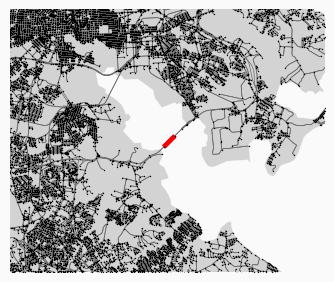

In [8]:
## zoomed map of the network
fig, ax = plt.subplots()
fig.set_figwidth(6.5 / 2) # page width
ax.axis('off')

# roads that weren't destroyed
roads[roads['highway'] != 'destroyed'].plot(
    color='dimgray',
    linewidth=0.5,
    zorder=5,
    ax=ax
)

# roads that were destroyed
roads[roads['highway'] == 'destroyed'].plot(
    color='red',
    linewidth=3,
    zorder=10,
    ax=ax
)

# intersections
intersections.plot(
    color='black',
    markersize=0.5,
    zorder=15,
    ax=ax
)

# bounds
zoom = 0.15
xlim = ax.get_xlim()
xlim = zoom*np.array(xlim) + (1-zoom)*np.mean(xlim)
ylim = ax.get_ylim()
ylim = zoom*np.array(ylim) + (1-zoom)*np.mean(ylim)

# add land
us_states.plot(
    facecolor='lightgray',
    edgecolor='white',
    zorder=0,
    ax=ax
)

# final things
ax.set_xlim(xlim) # keep bounds around baltimore
ax.set_ylim(ylim)
fig.tight_layout(pad=0)
folder = 'presentation' if present else 'paper'
if save: fig.savefig(f'{folder}/maps/zoomed_network.png', dpi=400) # us png not pdf bc its a really big file

In [9]:
## Number of tracts
print(f'Number of Home Tracts: {len(jtw['home'].unique())}')
print(f'Number of Work Tracts: {len(jtw['work'].unique())}')
print(f'Total Number of Tracts {len(np.unique(np.concatenate((jtw['home'], jtw['work']))))}')
print(f'Total Number of Pairs: {len(jtw)}')

Number of Home Tracts: 672
Number of Work Tracts: 678
Total Number of Tracts 678
Total Number of Pairs: 41272


In [10]:
## Number of Commuters
print(f'Number of Commuters: {int(jtw['flow'].sum())}')

Number of Commuters: 1015488


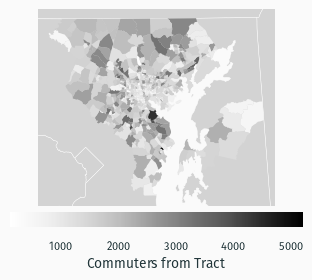

In [11]:
## Viz Tract Sources
fig, ax = plt.subplots()
fig.set_figwidth(3.25) # 1/2 page width
ax.axis('off')

tracts.plot(
    column='residents',
    legend=True,
    legend_kwds={
        'label': 'Commuters from Tract',
        'orientation': 'horizontal',
        'pad': 0.025,
        'shrink': 0.9
    },
    zorder=5,
    ax=ax
)

# bounds
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add land
us_states.plot(
    facecolor='lightgray',
    edgecolor='white',
    zorder=0,
    ax=ax
)

# final things
ax.set_xlim(xlim) # keep bounds around baltimore
ax.set_ylim(ylim)
fig.tight_layout(pad=0)
folder = 'presentation' if present else 'paper'
if save: fig.savefig(f'{folder}/maps/tract_home.pdf', bbox_inches='tight')

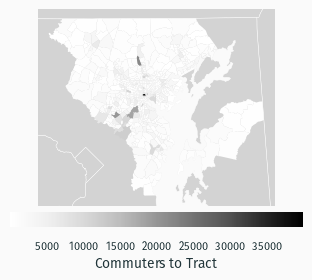

In [12]:
## Viz Tract Sources
fig, ax = plt.subplots()
fig.set_figwidth(3.25) # 1/2 page width
ax.axis('off')

tracts.plot(
    column='workers',
    legend=True,
    legend_kwds={
        'label': 'Commuters to Tract',
        'orientation': 'horizontal',
        'pad': 0.025,
        'shrink': 0.9,
    },
    zorder=5,
    ax=ax
)

# bounds
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add land
us_states.plot(
    facecolor='lightgray',
    edgecolor='white',
    zorder=0,
    ax=ax
)

# final things
ax.set_xlim(xlim) # keep bounds around baltimore
ax.set_ylim(ylim)
fig.tight_layout(pad=0)
folder = 'presentation' if present else 'paper'
if save: fig.savefig(f'{folder}/maps/tract_work.pdf', bbox_inches='tight')

/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


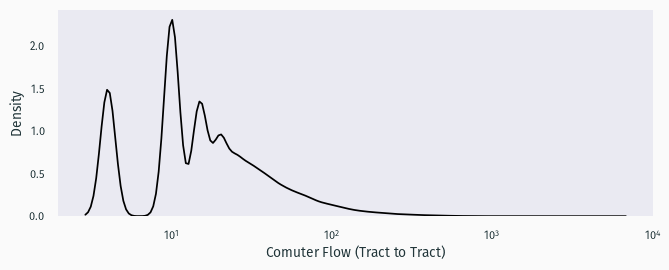

In [13]:
## Viz Tract Sources
fig, ax = plt.subplots()
fig.set_figwidth(6.5) # 1/2 page width
fig.set_figheight(2.5) # 1/2 page width
ax.set_xlabel('Comuter Flow (Tract to Tract)')

sns.kdeplot(
    jtw['flow'],
    log_scale=True,
    color='black',
    ax=ax
)

fig.tight_layout(pad=0)
folder = 'presentation' if present else 'paper'
if save: fig.savefig(f'{folder}/graphs/tract_flows.pdf', bbox_inches='tight')